<a href="https://colab.research.google.com/github/gtistiani/Text-Detection-with-OCR-using-Tesseract-KTP-NPWP/blob/main/Model_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pytesseract

In [ ]:
!sudo apt install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [ ]:
import cv2
# import re
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = (r'/bin/tesseract')
# from pytesseract import image_to_string
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# from google.colab import files
# uploaded = files.upload()

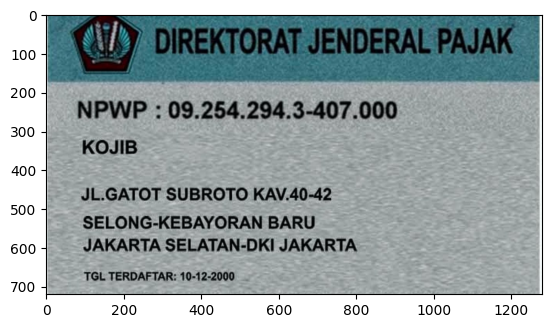

In [ ]:
img = cv2.imread('NPWP.jpg')
plt.imshow(img)

#Pre Processing

['1', '1', '0', '0', '0', '0', '0', '0', '1280', '720', '-1']
['2', '1', '1', '0', '0', '0', '63', '0', '169', '158', '-1']
['3', '1', '1', '1', '0', '0', '63', '0', '169', '158', '-1']
['4', '1', '1', '1', '1', '0', '63', '0', '169', '158', '-1']
['5', '1', '1', '1', '1', '1', '63', '0', '169', '158', '95']
['2', '1', '2', '0', '0', '0', '224', '27', '984', '82', '-1']
['3', '1', '2', '1', '0', '0', '224', '27', '984', '82', '-1']
['4', '1', '2', '1', '1', '0', '224', '27', '984', '82', '-1']
['5', '1', '2', '1', '1', '1', '224', '27', '24', '82', '83', ')']
['5', '1', '2', '1', '1', '2', '282', '35', '378', '68', '91', 'DIREKTORAT']
['5', '1', '2', '1', '1', '3', '676', '36', '317', '67', '92', 'JENDERAL']
['5', '1', '2', '1', '1', '4', '1012', '27', '196', '76', '92', 'PAJAK']
['2', '1', '3', '0', '0', '0', '83', '224', '822', '136', '-1']
['3', '1', '3', '1', '0', '0', '83', '224', '822', '136', '-1']
['4', '1', '3', '1', '1', '0', '83', '224', '822', '46', '-1']
['5', '1', '3', '1

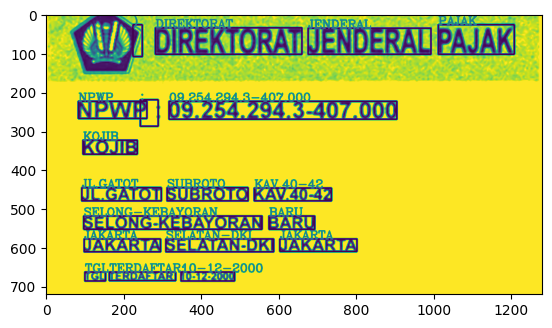

In [ ]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
noise=cv2.medianBlur(threshed,5)

#Detecting
# [   0          1           2           3           4          5         6       7       8        9        10       11 ]
# ['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text']
hImg, wImg,_ = img.shape
boxes = pytesseract.image_to_data(noise)
for x,b in enumerate(boxes.splitlines()):
  if x!=0:
    b = b.split()
    print(b)
    if len(b)==12:
      x,y,w,h = int(b[6]), int(b[7]), int(b[8]), int(b[9])
      cv2.rectangle(noise, (x,y), (w+x, h+y), (0,0,255), 3)
      cv2.putText(noise,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)

plt.imshow(noise)